# Importing Scikit-learn

In [1]:
import sklearn
print(sklearn.__version__)


1.2.2


Let's dive in the way. How scikit-learn works is you start with some data you then eventually give it to a model the model will learn from it and then you will be able to make predictions. That's the general flow. However let's be a little bit specific just giving data to a model is a bit vague so what do we mean by giving data to a model now typically if we have a data set that's useful for predictions then we can split the data set up into two parts and the common notation is to call one part of the data x and the other part of the data y. Now, typically my data set x represents everything that i'm using to make a prediction and my data set y contains the prediction that i'm interested in making the use case that we're going to deal with in a moment has to do with house.

# Importing a dataset into Scikit learn


In [2]:
from sklearn.datasets import load_diabetes 

# in case of Jupyter Notebook
# in kaggle, we can simply add dataset from input

In [3]:
import pandas as pd
data  = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', sep = ',')

data.head()

# i am skipping this dataset for right now. will work on it later

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


# importing sklearn datasets


In [4]:
from sklearn.datasets import load_diabetes

In [5]:
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

it's going to give me a dictionary with lots of items in it however there's a parameter that we can set called **return x y** and if **we set that to true** 

then we get **two arrays** out one array represents the house prices and these house prices are in thousands of dollars and these are all properties

In [6]:
X, y = load_diabetes(return_X_y = True)  #function

✅ What load_diabetes(return_X_y=True) does:
It loads the diabetes dataset (a built-in dataset in scikit-learn) and returns:

X: a 2D NumPy array of features (shape: 442 rows × 10 features)

y: a 1D NumPy array of target values (a quantitative measure of disease progression)

Now we are importing one sklearn model to work on the dataset. We will learn about the models in future

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
model = KNeighborsRegressor()

In [9]:
#  model.predict(X)

> ---------------------------------------------------------------------------
>NotFittedError                            Traceback (most recent call last)
/tmp/ipykernel_31/2413634177.py in <cell line: 0>()
----> 1 model.predict(X)


>  NotFittedError                            

As we did not fitted the datasets to the model yet, so, estimating about it is **ERROR** . 

**We have to fit the dataset first**

In [10]:
model.fit(X, y)

KNeighborsRegressor()

In [11]:
pred_KNeighbor = model.predict(X)
pred_KNeighbor

array([181.4,  80.8, 150.8, 203.4, 119.4, 108. ,  83.6, 120.6, 127.8,
       187.8, 121.4, 129.6,  98.8, 166.8, 106.6, 144. , 174.4, 177.8,
       132.8, 142. ,  80. ,  73.4, 113.4, 273.8, 151.4, 126.4, 132. ,
       137.8, 107.2, 192.2, 154.6,  65. , 287.8,  78.6,  78.6, 109.6,
       175.2, 172.6, 235. ,  76.4, 158.6, 113.4,  97.6,  74. , 257. ,
        92.8, 163. , 150.2, 110.8, 145.4, 121.2, 152.4, 130.6,  94. ,
       157.2,  88.8, 137.2, 101. , 132.2, 156.6, 115. , 124. ,  65.8,
       132.4, 128.4, 154.4, 119.6,  88.8,  96.2, 136.6,  81.6, 234.6,
       174.4, 109.8, 133.2,  72. , 171.8, 106.6, 179.4, 121.6, 134.4,
       107.8,  69.2, 141.2,  80. , 108.6,  92.8, 124.6,  68.6, 110.6,
        95. , 136.4, 153.4,  82.8,  83.8, 126.8, 170.6, 165.8,  88.6,
       126.2, 158.8,  86.2, 151.8, 155.4, 139.4,  87. , 115. , 143.2,
       181. , 183. ,  71.2,  99.4, 134.8, 202. , 277.4, 165.4, 255.4,
       207. , 126.6, 132.2, 130. , 202. , 232.4, 158.2, 136.4, 166.4,
       111.6,  92.8,

**We dont know yet how this specific model works. but we can say every model has its own different way to predict the dataset. For this, we will test it in another model**

In [12]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X,y)


LinearRegression()

# Showing the the predictions in scatter plot

In [13]:
pred = mod.predict(X)

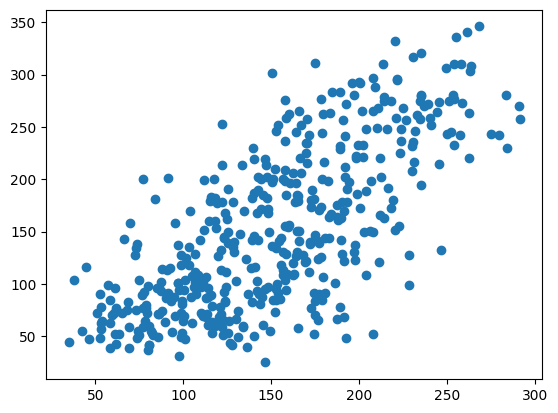

In [14]:
import matplotlib.pyplot as plt
plt.scatter(pred, y)

Let's see the plot of KNeighbors that we predict earlier


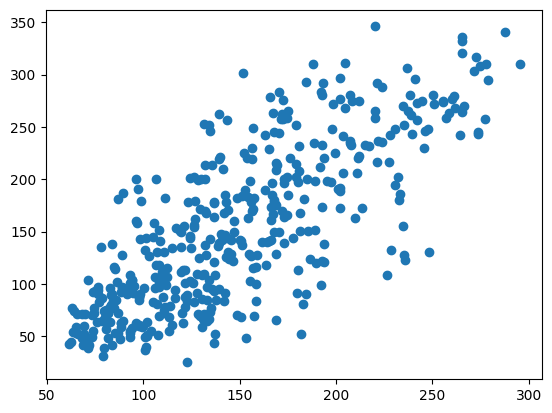

In [15]:
plt.scatter(pred_KNeighbor, y)

In many cases, the unit of X axis is way more larger than the unit of Y axis. So, this is good for us to **preprocess the dataset** before fitting it to the model

# Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In machine learning, a **pipeline** refers to a sequence of data processing steps that are chained together, usually to ensure clean, consistent, and reproducible preprocessing and modeling.

So when you say:

> I am giving my dataset to the pipeline to preprocess
> 
You mean that you're passing your raw dataset through a series of predefined steps (like cleaning, transforming, and feature selection), before it's fed into a model.

In [17]:
mod = KNeighborsRegressor().fit(X,y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

In [18]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [19]:
pred = pipe.predict(X)

As we have preprocessed the data, now we can see some new plot of **KNeighbors**

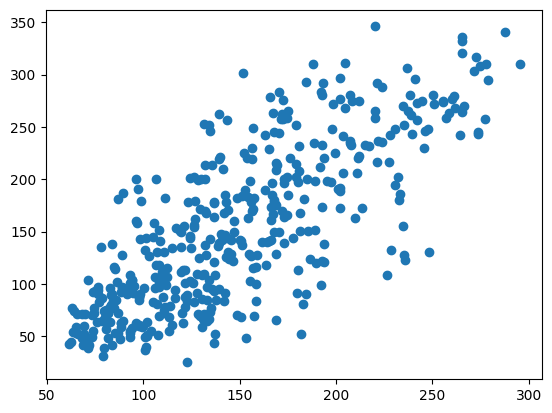

In [20]:
plt.scatter(pred, y)

# GridSearchCV

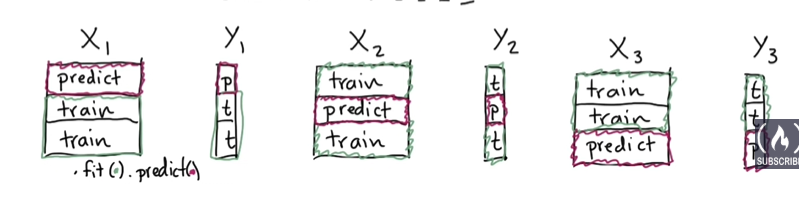

 i would like to pick this number of neighbors setting such that my model makes the best predictions and in order to figure out which predictions are the best one thing that we can do is we can compare our prediction with the original label but as we've seen in a previous video we have to be really careful here we don't
want to judge the model on the same data set as we're learning from and with that in mind maybe we should do a trick with a data set just to keep the methodology clean and here's the idea i'm going to cut this data set up into let's say three different segments and what i'm also going to do is i'm going to copy both data sets three times and here's the idea first i'm going to say well let's give this the predict name and let's do it over here i'll set the predict name here in the second set and i'll put predict down here in the third and i'm going to declare the other parts for training the first time around this part of the data set is going to be used for training and then given that trained model i can use this portion of the data that's not been used for training to test how well my predictions are going and in the next data copy i'm going to repeat the exercise but a different portion of the data is going to be used for prediction as well as training and finally the same thing happens here as well the idea here being i'm going to call dot fit dot predict here but i'm fitting on the green part and i'm predicting on the red part this prevents me from ever predicting on data that i've used during training but it does allow me to judge in the predict section of my data how well my predictions are

**To perform this task, we will use GridSearchCV**

In [21]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

import pandas as pd

> an estimator is something that has a dot fit as well as a predict and the pipeline that i've made earlier this one over here will do just fine

>  parameter grid is going to represent all the settings that we would like to go over

In [22]:
# to get the exact names of parameters of a function
# use .get_params()

pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [23]:
# here as estimator, we are using the pipeline we earlier
# used, named as "pipe"

# in our pipeline in particular the one that we're interested in changing is this number of neighbors
mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)

# cv stands for cross validation

In [24]:
mod.fit(X, y);
mod.cv_results_

{'mean_fit_time': array([0.00159693, 0.0012308 , 0.0011638 , 0.00113455, 0.00111953,
        0.00114171, 0.00111556, 0.00115291, 0.00112367, 0.00112939]),
 'std_fit_time': array([4.53614932e-04, 1.64610529e-05, 1.99297904e-05, 1.75518109e-05,
        9.71261096e-06, 2.48766554e-05, 4.72044703e-06, 1.77418598e-05,
        2.80754117e-06, 4.91319705e-06]),
 'mean_score_time': array([0.00162991, 0.00165979, 0.00176136, 0.00177312, 0.00168451,
        0.00174133, 0.00177519, 0.00182382, 0.0018657 , 0.00190806]),
 'std_score_time': array([3.02490032e-05, 1.62979441e-05, 8.47162046e-05, 1.43695150e-04,
        1.80363125e-05, 8.62124864e-06, 2.45623856e-05, 2.23328634e-05,
        1.42112051e-05, 2.37087668e-05]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


**Lets learn about the datasets we used**

In [25]:
# DESCR = description

load_diabetes()['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [26]:
# print it for a nice output

print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1